## Dataset: [Tweet Emotion Dataset](https://huggingface.co/datasets/SetFit/emotion)

---

## Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.7 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


## Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
!pip install datasets
from datasets import load_dataset

data = load_dataset("SetFit/emotion")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 21.3 MB/s eta 0:00:00


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/SetFit___json/SetFit--emotion-e444b7640ce3116e/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [ ]:
test = data['test']
train = data['train']
val = data['validation']

In [ ]:
def get_tweet(d):
    tweet = [x['text'] for x in d]
    label = [x['label_text'] for x in d]

    return tweet, label

In [ ]:
tweet, label = get_tweet(train)

In [ ]:
tweet[5], label[5]

('ive been feeling a little burdened lately wasnt sure why that was',
 'sadness')

## Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words= 10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweet)

## Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

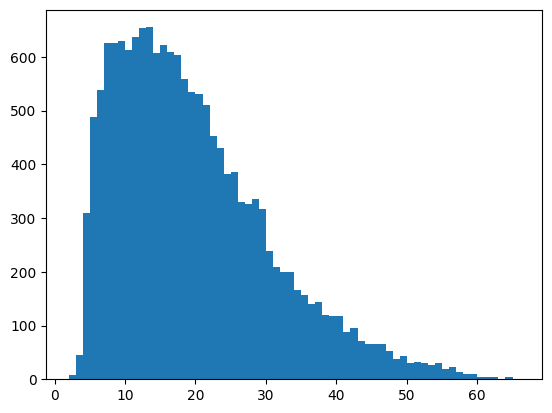

In [ ]:
lengths = [len(t.split(' ')) for t in tweet]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [ ]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequences(tokenizer, tweet):
    sequences = tokenizer.texts_to_sequences(tweet)
    padded_seq = pad_sequences(sequences, padding= 'post', truncating= 'post', maxlen= maxlen)

    return padded_seq

In [ ]:
padded_trained_seq = get_sequences(tokenizer, tweet)

In [ ]:
padded_trained_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(label)
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

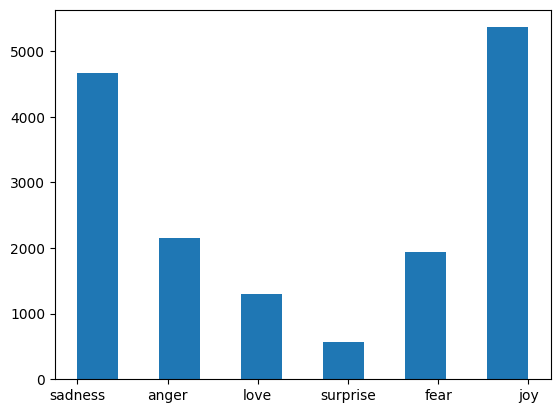

In [ ]:
plt.hist(label, bins = 11)
plt.show()

In [ ]:
class_to_index = dict((c, i) for i,c in enumerate(classes))
index_to_class = dict((v, k) for k,v in class_to_index.items())

In [ ]:
print(class_to_index)
print(index_to_class)

{'surprise': 0, 'sadness': 1, 'joy': 2, 'fear': 3, 'anger': 4, 'love': 5}
{0: 'surprise', 1: 'sadness', 2: 'joy', 3: 'fear', 4: 'anger', 5: 'love'}


In [ ]:
names_to_ids = lambda label: np.array([class_to_index.get(x) for x in label])

In [ ]:
train_labels = names_to_ids(label)
train_labels[0]

1

## Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, LSTM
from tensorflow.keras.models import Sequential
model = Sequential([
                    Embedding(10000, 16, input_length= maxlen),
                    Bidirectional(LSTM(20, return_sequences= True)),
                    Bidirectional(LSTM(20)),
                    Dense(6, activation= 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [ ]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 1)

In [ ]:
h = model.fit(padded_trained_seq, train_labels, validation_data= (val_seq, val_labels), epochs= 10)

Epoch 1/10
500/500 [==============================] - 50s 70ms/step - loss: 1.2399 - accuracy: 0.5125 - val_loss: 0.7081 - val_accuracy: 0.7485
Epoch 2/10
500/500 [==============================] - 11s 22ms/step - loss: 0.4893 - accuracy: 0.8271 - val_loss: 0.5302 - val_accuracy: 0.8185
Epoch 3/10
500/500 [==============================] - 11s 21ms/step - loss: 0.2949 - accuracy: 0.8981 - val_loss: 0.4878 - val_accuracy: 0.8370
Epoch 4/10
500/500 [==============================] - 9s 18ms/step - loss: 0.2092 - accuracy: 0.9320 - val_loss: 0.4652 - val_accuracy: 0.8555
Epoch 5/10
500/500 [==============================] - 10s 20ms/step - loss: 0.1555 - accuracy: 0.9494 - val_loss: 0.4195 - val_accuracy: 0.8655
Epoch 6/10
500/500 [==============================] - 11s 21ms/step - loss: 0.1277 - accuracy: 0.9578 - val_loss: 0.4139 - val_accuracy: 0.8760
Epoch 7/10
500/500 [==============================] - 8s 15ms/step - loss: 0.1039 - accuracy: 0.9677 - val_loss: 0.4129 - val_accuracy: 0

## Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

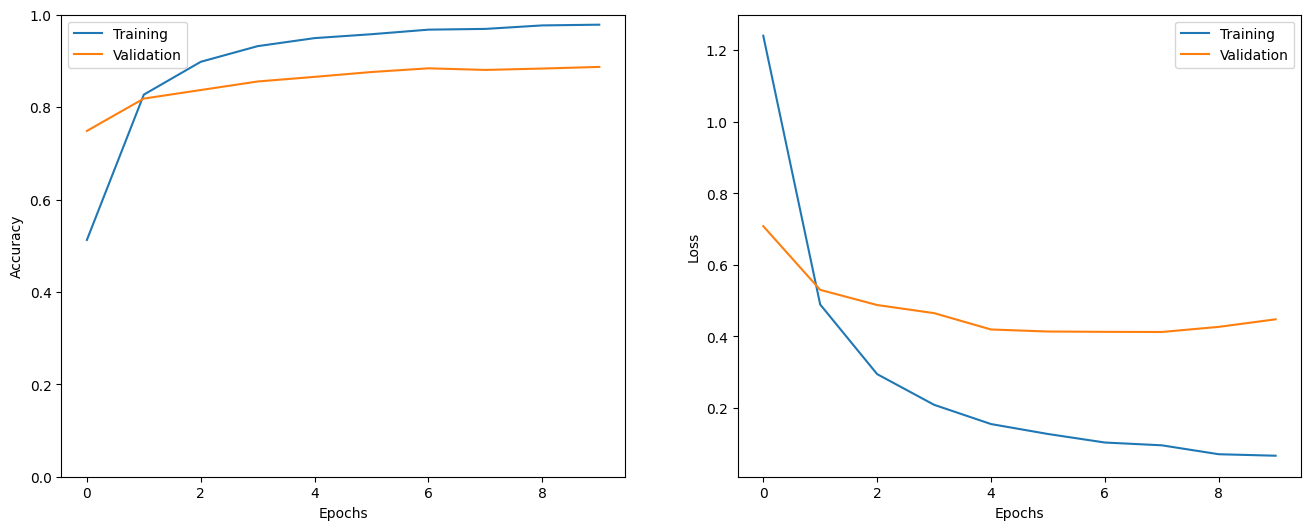

In [ ]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [ ]:
test_tweets, test_labels = get_tweet(test)
test_seq= get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [ ]:
model.evaluate(test_seq, test_labels)

63/63 [==============================] - 0s 7ms/step - loss: 0.4756 - accuracy: 0.8705


[0.47555336356163025, 0.8705000281333923]

In [ ]:
preds = np.argmax(model.predict(test_seq), axis=-1)

63/63 [==============================] - 2s 6ms/step


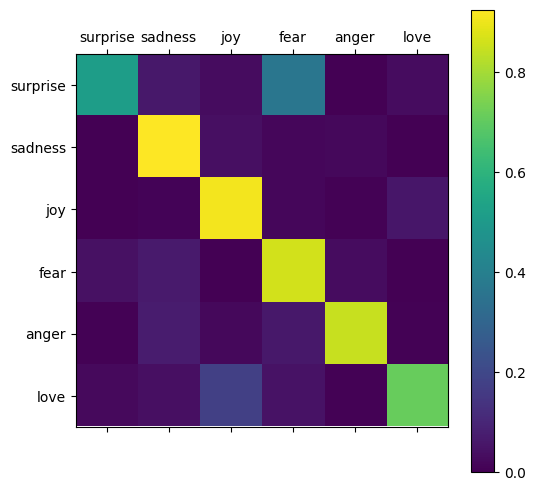

In [ ]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(6, 6))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

show_confusion_matrix(test_labels, preds, list(classes))

In [ ]:
i = random.randint(0, len(test_labels) - 1)

print('Tweet:', test_tweets[i])
print('Emotion:', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis= 0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion:', pred_class)

Tweet: i feel lonely who make me feel special when i feel useless who are always kind and sweet to me
Emotion: sadness
1/1 [==============================] - 0s 23ms/step
Predicted Emotion: joy


In [ ]:
model.save('tweet_emotion.h5')